In [1]:
!git clone https://github.com/garima-mahato/ERA_V1.git

Cloning into 'ERA_V1'...
remote: Enumerating objects: 218, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 218 (delta 101), reused 132 (delta 42), pack-reused 0
Receiving objects: 100% (218/218), 5.23 MiB | 21.17 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [2]:
from ERA_V1.Session8_BatchNormalizationAndRegularization import *

In [3]:

# # CUDA?

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

device = set_device()

CUDA Available? True


## Model Architecture

In [26]:
!pip install torchsummary
from torchsummary import summary

model = CIFAR10_Classifier_LN_Modified().to(device)
summary(model, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 30, 30]             216
              ReLU-2            [-1, 8, 30, 30]               0
         LayerNorm-3            [-1, 8, 30, 30]          14,400
           Dropout-4            [-1, 8, 30, 30]               0
            Conv2d-5           [-1, 10, 28, 28]             720
              ReLU-6           [-1, 10, 28, 28]               0
         LayerNorm-7           [-1, 10, 28, 28]          15,680
           Dropout-8           [-1, 10, 28, 28]               0
            Conv2d-9            [-1, 8, 28, 28]              80
        MaxPool2d-10            [-1, 8, 14, 14]               0
           Conv2d-11           [-1, 10, 14, 14]             720
             ReLU-12           [-1, 10, 14, 14]               0
    

## Dataset Creation

In [14]:
# Train data transformations
train_transforms = transforms.Compose([
    #transforms.RandomAffine(degrees=20, translate=(0.1,0.1), scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.49139968, 0.48215827 ,0.44653124), (0.24703233, 0.24348505, 0.26158768)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.49139968, 0.48215827 ,0.44653124), (0.24703233, 0.24348505, 0.26158768))
    ])

train_data = datasets.CIFAR10('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10('../data', train=False, download=True, transform=test_transforms)

# set seed
torch.manual_seed(1)

batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
kwargs.update({'batch_size': batch_size, 'shuffle': True})

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

Files already downloaded and verified
Files already downloaded and verified


Data Visualization

In [ ]:
CIFAR10_CLASS_LABELS = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

 ship  bird   cat   dog


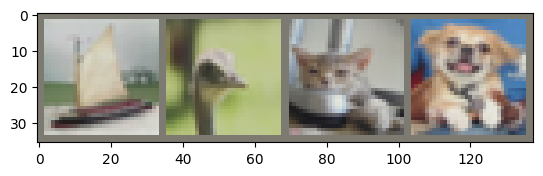

In [ ]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % CIFAR10_CLASS_LABELS[labels[j]] for j in range(4)))

## Model Training and Testing

In [27]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

dropout_value = 0#.05

model = CIFAR10_Classifier_LN_Modified(dropout_value=dropout_value).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, train_acc, train_losses)
  scheduler.step()
  test(model, device, test_loader, test_acc, test_losses)


Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=1.5604 Batch_id=390 Accuracy=27.79: 100%|██████████| 391/391 [00:20<00:00, 19.18it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 1.6360, Accuracy: 3908/10000 (39.08%)

Epoch 2


Train: Loss=1.2691 Batch_id=390 Accuracy=44.53: 100%|██████████| 391/391 [00:20<00:00, 18.70it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 1.4476, Accuracy: 4765/10000 (47.65%)

Epoch 3


Train: Loss=1.2596 Batch_id=390 Accuracy=52.46: 100%|██████████| 391/391 [00:19<00:00, 20.09it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 1.2390, Accuracy: 5554/10000 (55.54%)

Epoch 4


Train: Loss=1.1582 Batch_id=390 Accuracy=57.66: 100%|██████████| 391/391 [00:19<00:00, 19.94it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 1.1633, Accuracy: 5809/10000 (58.09%)

Epoch 5


Train: Loss=0.9210 Batch_id=390 Accuracy=61.32: 100%|██████████| 391/391 [00:19<00:00, 20.07it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 1.0992, Accuracy: 6061/10000 (60.61%)

Epoch 6


Train: Loss=1.0223 Batch_id=390 Accuracy=63.65: 100%|██████████| 391/391 [00:19<00:00, 19.58it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 1.1038, Accuracy: 6042/10000 (60.42%)

Epoch 7


Train: Loss=0.9897 Batch_id=390 Accuracy=65.52: 100%|██████████| 391/391 [00:19<00:00, 19.62it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 1.0206, Accuracy: 6353/10000 (63.53%)

Epoch 8


Train: Loss=0.8556 Batch_id=390 Accuracy=67.30: 100%|██████████| 391/391 [00:19<00:00, 19.91it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.9880, Accuracy: 6479/10000 (64.79%)

Epoch 9


Train: Loss=1.0066 Batch_id=390 Accuracy=68.71: 100%|██████████| 391/391 [00:19<00:00, 20.25it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.9711, Accuracy: 6535/10000 (65.35%)

Epoch 10


Train: Loss=0.7505 Batch_id=390 Accuracy=69.90: 100%|██████████| 391/391 [00:19<00:00, 20.48it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.9523, Accuracy: 6605/10000 (66.05%)

Epoch 11


Train: Loss=0.7378 Batch_id=390 Accuracy=73.83: 100%|██████████| 391/391 [00:19<00:00, 19.91it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.9037, Accuracy: 6799/10000 (67.99%)

Epoch 12


Train: Loss=0.8557 Batch_id=390 Accuracy=74.50: 100%|██████████| 391/391 [00:20<00:00, 19.35it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.9033, Accuracy: 6827/10000 (68.27%)

Epoch 13


Train: Loss=0.6750 Batch_id=390 Accuracy=74.85: 100%|██████████| 391/391 [00:20<00:00, 19.53it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.9049, Accuracy: 6826/10000 (68.26%)

Epoch 14


Train: Loss=0.6658 Batch_id=390 Accuracy=75.02: 100%|██████████| 391/391 [00:19<00:00, 20.19it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.9070, Accuracy: 6815/10000 (68.15%)

Epoch 15


Train: Loss=0.6038 Batch_id=390 Accuracy=75.38: 100%|██████████| 391/391 [00:18<00:00, 20.60it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.9041, Accuracy: 6832/10000 (68.32%)

Epoch 16


Train: Loss=0.5226 Batch_id=390 Accuracy=75.62: 100%|██████████| 391/391 [00:19<00:00, 20.31it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.9062, Accuracy: 6811/10000 (68.11%)

Epoch 17


Train: Loss=0.5457 Batch_id=390 Accuracy=75.79: 100%|██████████| 391/391 [00:20<00:00, 19.51it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.9070, Accuracy: 6822/10000 (68.22%)

Epoch 18


Train: Loss=0.7538 Batch_id=390 Accuracy=75.95: 100%|██████████| 391/391 [00:19<00:00, 19.68it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.9090, Accuracy: 6838/10000 (68.38%)

Epoch 19


Train: Loss=0.6772 Batch_id=390 Accuracy=76.19: 100%|██████████| 391/391 [00:19<00:00, 20.18it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.9156, Accuracy: 6814/10000 (68.14%)

Epoch 20


Train: Loss=0.5566 Batch_id=390 Accuracy=76.42: 100%|██████████| 391/391 [00:18<00:00, 20.65it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.9115, Accuracy: 6848/10000 (68.48%)



In [18]:
save_network('ERA_V1/Session8_BatchNormalizationAndRegularization', 'layer_norm_saved_model', model, train_losses, test_losses, train_acc, test_acc)


 Saving trained model and parameters...


### Accuracy/Loss Visualization

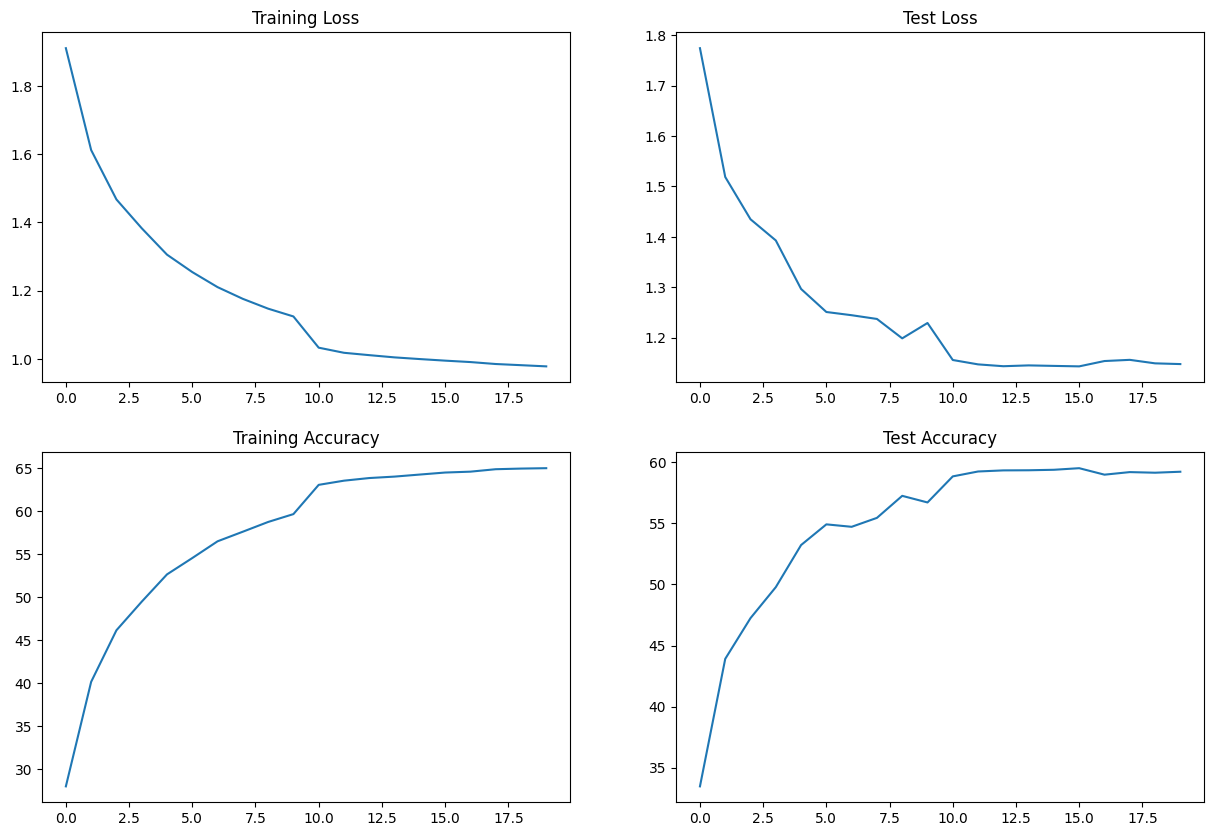

In [19]:
vis_train_test_comp_graphs(train_losses, train_acc, test_losses, test_acc)

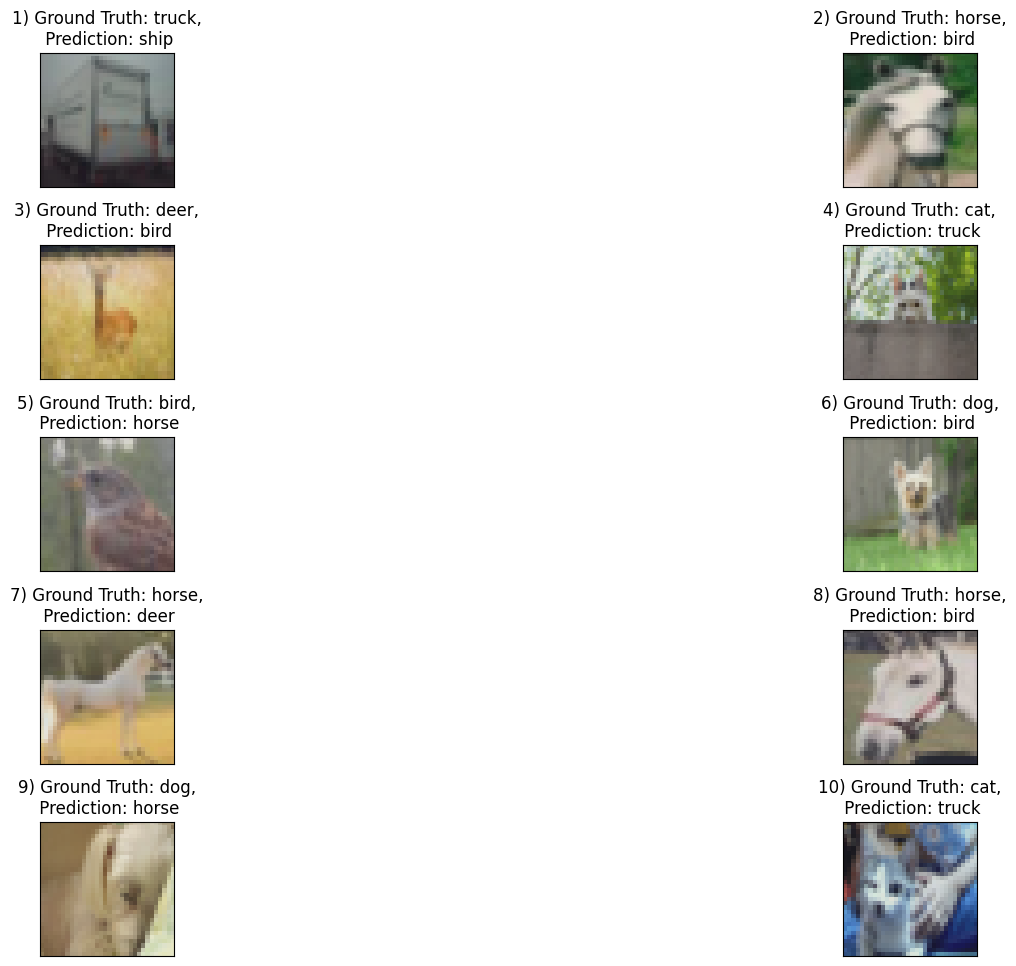

In [17]:
show_save_misclassified_images(model, test_loader, device, 'ERA_V1/Session8_BatchNormalizationAndRegularization/assets', name="cifar10_layer_norm_misclassified_imgs", max_misclassified_imgs=10) #, is_cifar10=True, labels_list=CIFAR10_CLASS_LABELS)

In [20]:
%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master
from torchviz import make_dot, make_dot_from_trace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/szagoruyko/pytorchviz.git (to revision master) to /tmp/pip-req-build-8yvgyijb
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz.git /tmp/pip-req-build-8yvgyijb
  Resolved https://github.com/szagoruyko/pytorchviz.git to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4972 sha256=2c7cd278c2ee7cde1e463bb31ddb1bce454056735d18a24d2fd673b04203d805
  Stored in directory: /tmp/pip-ephem-wheel-cache-enp02ovp/wheels/97/11/17/d09e895f9883bd50923ce86b249a31790356a1b88b280983d8
Successfully built torchviz


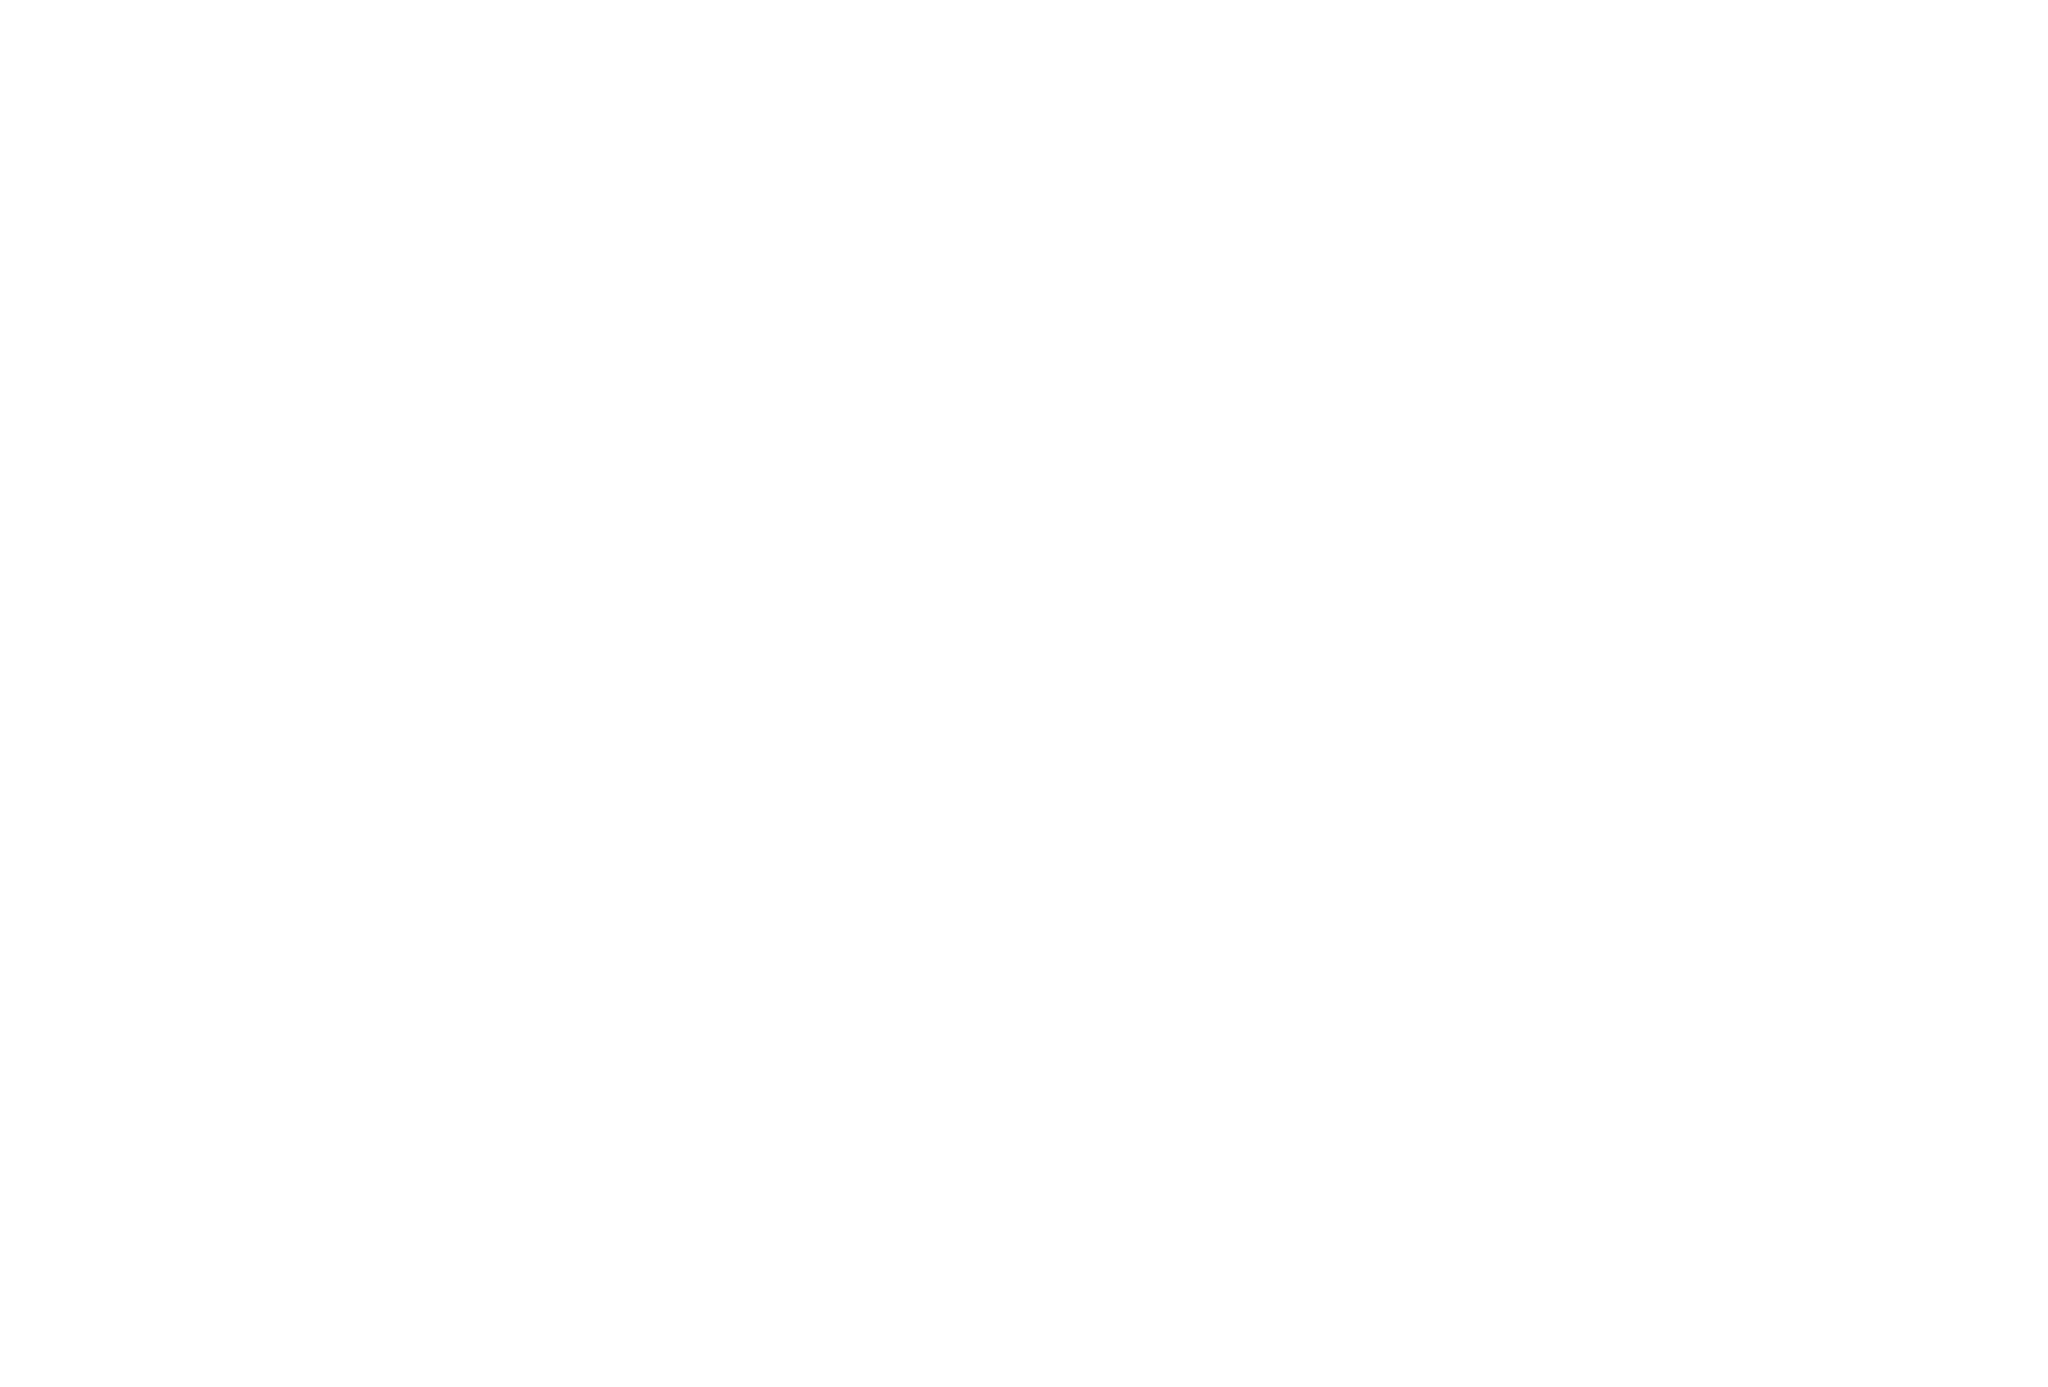

In [21]:
batch_data, batch_label = next(iter(train_loader))
batch_data = batch_data.to(device)
y = model(batch_data)

make_dot(y, params=dict(list(model.named_parameters())), show_attrs=True, show_saved=True)

In [22]:
make_dot(y, params=dict(list(model.named_parameters())), show_attrs=True, show_saved=True).render("cifar10_ln_torchviz", format="png")

'cifar10_ln_torchviz.png'